# SME0829 Aprendizado de Máquina


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Máquinas de suporte vetorial

### Classificação em dados binários com padrão radial


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



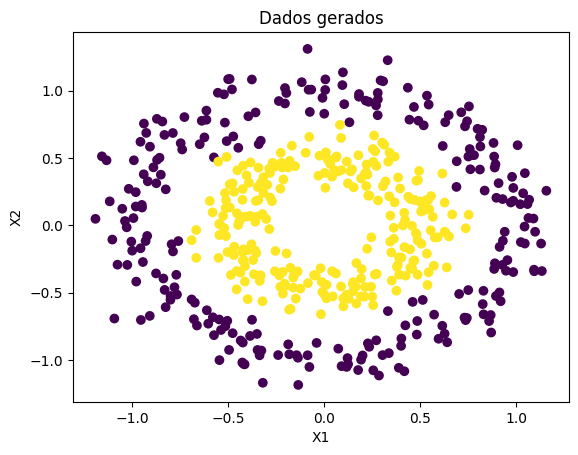

In [17]:
# Gerar um conjunto de dados com padrão circular
X, y = datasets.make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dados gerados');

In [ ]:

# Criar e treinar o classificador SVM com kernel RBF
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Função para plotar as regiões de decisão
def plot_decision_regions(X, y, classifier):
    h = 0.02  # Tamanho do passo na grade
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision regions')


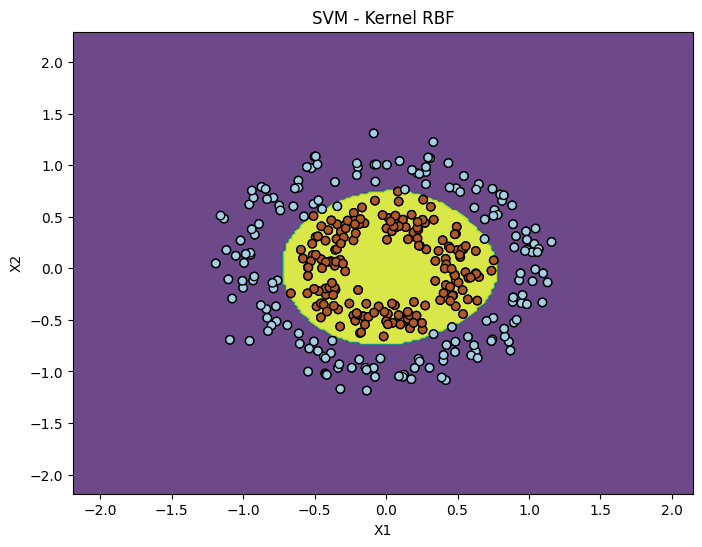

Acurácia no conjunto de teste: 0.9866666666666667


In [6]:
# Plotar as regiões de decisão e os dados de treinamento
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, svm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title('SVM - Kernel RBF')
plt.show()

# Avaliar a precisão do classificador no conjunto de teste
accuracy = svm.score(X_test, y_test)
print('Acurácia no conjunto de teste:', accuracy)

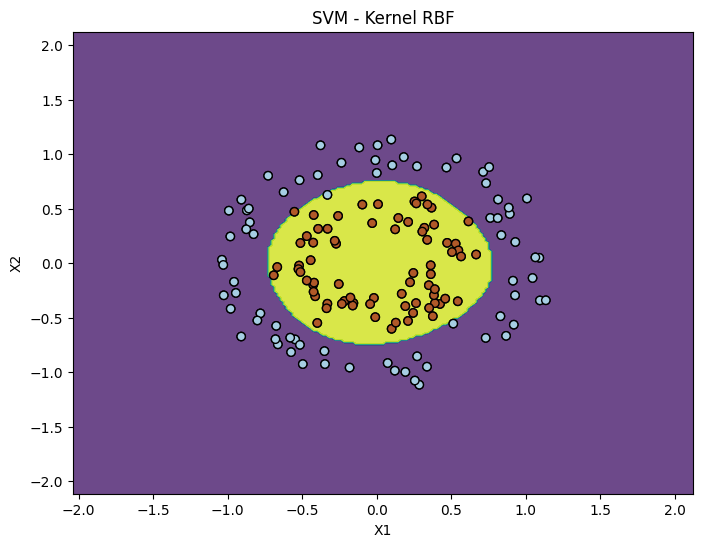

In [8]:
# Plotar as regiões de decisão e os dados de teste
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, svm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.title('SVM - Kernel RBF')
plt.show()